<a href="https://colab.research.google.com/github/girishkuniyal/Cat-Dog-CNN-Classifier/blob/master/pytorch_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision import transforms
from torch import nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Code for Reproducability
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

#Dataset Analysis

In [0]:
#60000 train images
#10000 test images

train_dataset = torchvision.datasets.MNIST(root = "../data/mnist/",train=True,
                                          transform = transforms.ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root = "../data/mnist/",train=False,
                                         transform = transforms.ToTensor())



In [0]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = 64,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = 64,
                                          shuffle = False)

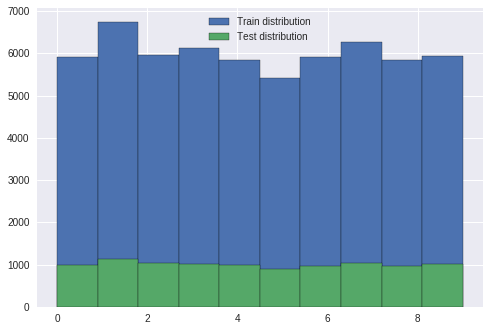

In [5]:
plt.rcParams["patch.force_edgecolor"] = True
plt.hist(train_dataset.targets.numpy(),label="Train distribution")
plt.hist(test_dataset.targets.numpy(),label="Test distribution")
plt.legend();


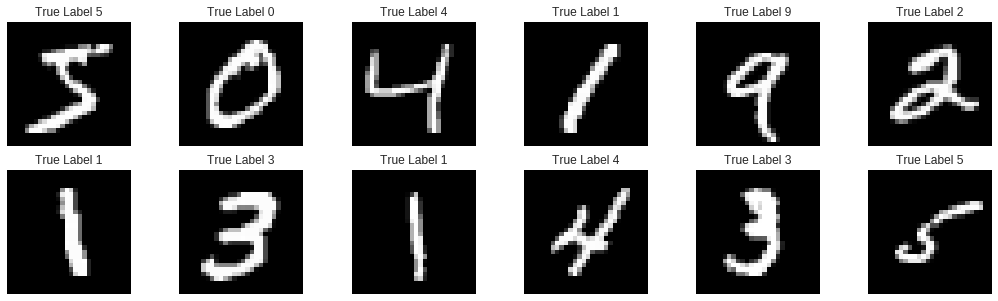

In [6]:
fig,axarr = plt.subplots(2,6,figsize=(18,5))

for i in range(12):
  plt.subplot(2,6,i+1)
  ax = plt.imshow(train_dataset.data[i],cmap="gray")
  plt.title("True Label {}".format(train_dataset.targets[i]))
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False);
  
  

# Simple FeedForward Neural Network
Here we simple flatten all our images and pass through our fully connected Neural network

In [0]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.fc1 = nn.Linear(784,512)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(512,128)
    self.fc3 = nn.Linear(128,10)
    self.softmax = nn.Softmax()
   
  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu(out)
    out = self.fc3(out)
    out = self.softmax(out)
    return out
    
    
  
  

In [0]:
model = NeuralNetwork().to("cuda") #for without GPU use "cpu"

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.03,momentum=0.5)

In [10]:
value = model.parameters() # Generator object

print(value.__next__().shape) # weights layer1 :   512*784
print(value.__next__().shape) # bias layer 1 :    512
print(value.__next__().shape) # weights layer 2 :  128*512
print(value.__next__().shape) # bias layer 2 :    128
print(value.__next__().shape) # weights layer 3 :  10*128
print(value.__next__().shape) # bias layer 3:     10





torch.Size([512, 784])
torch.Size([512])
torch.Size([128, 512])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])


In [11]:
total_step = len(train_loader) #937.5
total_step

938

In [12]:
epoches = 20
for epoch in range(epoches):
  for i,(images,labels) in enumerate(train_loader):
    
    images = images.reshape(-1,784).to("cuda")
    labels = labels.to("cuda")
    
    #forward pass and loss calculation
    outputs = model(images)
    loss = criterion(outputs,labels)
    
    #backward pass and gradient update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if( (i+1)%100 == 0):
      print("Epoches {}/{} Steps {}/{} loss: {:.5f}".format(epoch+1,epoches,i+1,
                                                       total_step,loss.item()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Epoches 1/20 Steps 100/938 loss: 2.30031
Epoches 1/20 Steps 200/938 loss: 2.29746
Epoches 1/20 Steps 300/938 loss: 2.29199
Epoches 1/20 Steps 400/938 loss: 2.28084
Epoches 1/20 Steps 500/938 loss: 2.24396
Epoches 1/20 Steps 600/938 loss: 2.17666
Epoches 1/20 Steps 700/938 loss: 2.13435
Epoches 1/20 Steps 800/938 loss: 1.99006
Epoches 1/20 Steps 900/938 loss: 1.96435
Epoches 2/20 Steps 100/938 loss: 1.74870
Epoches 2/20 Steps 200/938 loss: 1.75070
Epoches 2/20 Steps 300/938 loss: 1.84562
Epoches 2/20 Steps 400/938 loss: 1.72505
Epoches 2/20 Steps 500/938 loss: 1.62490
Epoches 2/20 Steps 600/938 loss: 1.71405
Epoches 2/20 Steps 700/938 loss: 1.70891
Epoches 2/20 Steps 800/938 loss: 1.65773
Epoches 2/20 Steps 900/938 loss: 1.68115
Epoches 3/20 Steps 100/938 loss: 1.63239
Epoches 3/20 Steps 200/938 loss: 1.59041
Epoches 3/20 Steps 300/938 loss: 1.53719
Epoches 3/20 Steps 400/938 loss: 1.68045
Epoches 3/20 Steps 500/938 loss: 1.69825
Epoches 3/20 Steps 600/938 loss: 1.59440
Epoches 3/20 Ste

In [13]:
# Test our model
# Dont require gradient computing , fast and efficent
with torch.no_grad():
  correct = 0
  total = 0
  
  for images,labels in test_loader:
    images = images.reshape(-1,784).to("cuda")
    labels = labels.to("cuda")
    
    outputs = model(images)
    _,predict = torch.max(outputs,1)
    total += len(labels)
    correct += (predict == labels).sum().item()
  print("Accuracy :",correct/total)
    
  
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Accuracy : 0.9532


In [14]:
# look at torch.max operation
a = torch.tensor([[2,3,1],
                  [5,2,7]])
torch.max(a,1) #return value,index

(tensor([3, 7]), tensor([1, 2]))

In [15]:
# Understand some code
a = torch.tensor([1,3,5,6])
b = torch.tensor([1,6,5,7])
(a==b).sum().item()

2

In [0]:
#Save your model

#torch.save(model.state_dict(), 'model.ckpt')